# UltraLeap import playground

Notebook status 20.09.2022

In [1]:
# Import public packages and functions
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from itertools import compress
from scipy.spatial import distance
#from scipy import signal
from scipy.ndimage import uniform_filter1d
import math
from scipy.signal import find_peaks, peak_prominences
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import statsmodels.api as sm


In [2]:
# Import own functions
import import_data.import_unity_positions as import_unity
import import_data.import_and_convert_data as import_dat
# import sig_processing.select_data as select_data

import movement_calc.calc_3d_distances as calc_3d
import movement_calc.helpfunctions as hp

### Function that iterates over subject files

In [3]:
import_dat.find_onedrive_path()

('c:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\Patientdata',
 'c:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin')

In [4]:
def find_available_subs():

    subs = os.listdir(import_dat.find_onedrive_path()[0])
    subs = [s for s in subs if s[:2].lower() == 'ul']

    return subs

In [5]:
def show_sub_files(
    sub: str,
    # cam_pos: list,
    cam: str,
    rec_moment = None,  # consider to select on moment (12mfu etc)
    state = None,  # consider to select med-stim state
    task = str,
    side = str
    ):

    """
    doc-string with explanation
    """
    data_path, _ = import_dat.find_onedrive_path()

    # sub_folder_dir = os.path.join(data_path, f'UL{sub}\\{cam}\\UL{sub}_{state}_{cam}_{task}\\UL{sub}_{state}_{cam}_{task}_{side}.csv')
    sub_folder_dir = os.path.join(data_path, f'ul{sub}\\{cam}\\ul{sub}_{state}_{cam}_{task}\\ul{sub}_{state}_{cam}_{task}_{side}.csv')

    print(sub_folder_dir)

    # folder = os.listdir(sub_folder_dir)

    return sub_folder_dir #folder, sub_folder_dir

In [6]:
subs = find_available_subs()

for sub in subs:
    dir = show_sub_files(
        sub[2:],
        'desktop',
        None,
        'm1',
        'oc',
        'rh'
    )
    print(sub, dir)

c:\Users\madal\OneDrive - Charité - Universitätsmedizin Berlin\Ultraleap-hand-tracking\data\Patientdata\ul001\desktop\ul001_m1_desktop_oc\ul001_m1_desktop_oc_rh.csv
ul001 c:\Users\madal\OneDrive - Charité - Universitätsmedizin Berlin\Ultraleap-hand-tracking\data\Patientdata\ul001\desktop\ul001_m1_desktop_oc\ul001_m1_desktop_oc_rh.csv
c:\Users\madal\OneDrive - Charité - Universitätsmedizin Berlin\Ultraleap-hand-tracking\data\Patientdata\ul002\desktop\ul002_m1_desktop_oc\ul002_m1_desktop_oc_rh.csv
ul002 c:\Users\madal\OneDrive - Charité - Universitätsmedizin Berlin\Ultraleap-hand-tracking\data\Patientdata\ul002\desktop\ul002_m1_desktop_oc\ul002_m1_desktop_oc_rh.csv
c:\Users\madal\OneDrive - Charité - Universitätsmedizin Berlin\Ultraleap-hand-tracking\data\Patientdata\ul003\desktop\ul003_m1_desktop_oc\ul003_m1_desktop_oc_rh.csv
ul003 c:\Users\madal\OneDrive - Charité - Universitätsmedizin Berlin\Ultraleap-hand-tracking\data\Patientdata\ul003\desktop\ul003_m1_desktop_oc\ul003_m1_desktop_oc

In [7]:
def find_file_path(
    sub, cam_pos, task, condition, side
):

    # find folder with defined data
    subpath = os.path.join(import_dat.find_onedrive_path()[0], f'ul{sub}')
    cam_folder = os.path.join(subpath, cam_pos.lower())
    # only take folder with defined task
    files = os.listdir(cam_folder)
    sel_files = [f for f in files if (
        task.lower() in f and condition.lower() in f)]
    
    sel_folder = os.path.join(cam_folder, sel_files[0])
    data_files = os.listdir(sel_folder)
    # select on side
    if side.lower() == 'left':
        data_files = [f for f in data_files if 'lh' in f]
    elif side.lower() == 'right':
        data_files = [f for f in data_files if 'rh' in f]

    pathfile = (os.path.join(sel_folder, data_files[0]))

    return pathfile

In [8]:
def extract_cont_features(
    feats_incl: list,
    sub: str, task, condition, side,
    cam_pos, handpoints,
):
    """
    explanation of funcction

    Arguments:
        - feats_incl: ...
        - sub: subject code as string
    
    Returns:
        - df_out
    
    Raises:
        - ValueErrors if campos or side are incorrect

    """
    if side.lower() not in ['left', 'right']:
        raise ValueError('incorrect side variable')
    
    if cam_pos.lower() not in ['vr', 'dt', 'st']:
        raise ValueError('incorrect camera variable')
    
    # find path of defined data
    pathfile = find_file_path(
        sub=sub, cam_pos=cam_pos, task=task,
        condition=condition, side=side,
    )
    assert os.path.exists(pathfile), (
        f'selected path does not exist {pathfile}')

    # load selected file
    data = import_dat.import_string_data(pathfile)
    # clean data
    data = import_dat.remove_double_and_onlyNan_rows(data)
    
    # define two points to calculate distance



    # define point to calculate speed

    # extract speed from data

    # df_out = []

    return data #df_out

In [9]:
out = extract_cont_features(
    sub='001', feats_incl=['speed', 'distance'], task='oc',
    condition='M1', side='right', cam_pos='vR', handpoints='index_tip')
out

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,11:30:37:5920,1.2651,0.0166,0.1004,0.0897,0.0068,0.0681,0.1040,0.0191,0.0426,...,0.1274,0.0476,0.0454,0.1307,0.0506,9498.0,0.0,1767.20,1.0,1.0
1,11:30:37:6245,1.2976,0.0166,0.1019,0.0887,0.0078,0.0697,0.1029,0.0198,0.0441,...,0.1261,0.0483,0.0468,0.1293,0.0516,8049.0,0.0,1803.20,1.0,1.0
2,11:30:37:6416,1.3147,0.0167,0.1023,0.0885,0.0083,0.0700,0.1026,0.0201,0.0445,...,0.1256,0.0487,0.0470,0.1286,0.0523,4856.0,0.0,1675.20,1.0,1.0
3,11:30:37:6579,1.3310,0.0166,0.1023,0.0885,0.0083,0.0701,0.1027,0.0199,0.0446,...,0.1257,0.0486,0.0471,0.1285,0.0524,2982.0,0.0,1630.20,1.0,1.0
4,11:30:37:6749,1.3480,0.0166,0.1022,0.0887,0.0078,0.0699,0.1031,0.0192,0.0444,...,0.1260,0.0478,0.0469,0.1285,0.0519,1345.0,0.0,1522.20,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,11:31:03:3158,26.9888,0.0166,0.0705,-0.0933,-0.2568,0.0351,-0.0965,-0.2484,0.0051,...,-0.1208,-0.2530,-0.0039,-0.1165,-0.2494,7722.0,0.0,6575.30,1.0,1.0
1153,11:31:03:3314,27.0045,0.0166,0.0741,-0.0921,-0.2604,0.0389,-0.0970,-0.2524,0.0090,...,-0.1216,-0.2599,-0.0003,-0.1170,-0.2562,4726.0,0.0,6298.10,1.0,1.0
1154,11:31:03:3476,27.0206,0.0166,0.0783,-0.0908,-0.2632,0.0426,-0.0970,-0.2564,0.0125,...,-0.1224,-0.2668,0.0038,-0.1181,-0.2633,9438.0,0.0,5790.00,1.0,1.0
1155,11:31:03:3642,27.0372,0.0166,0.0883,-0.0849,-0.2617,0.0525,-0.0927,-0.2594,0.0222,...,-0.1189,-0.2771,0.0153,-0.1156,-0.2746,6290.0,0.0,5022.50,1.0,1.0


### Division of data per task (if necessary)

In [10]:
def task(
    df,
    time1,
    time2
    ):
    
    """ Divides the cleaned data between two time points (can 
    be used in cases where all task are in the same file).
        
        Input:
            - cleaned df (DataFrame),
            time1: global_time of the start of a task, 
            time2: global_time of the end of a task.
        
        Output:
            - new dataframe for specific task/block.
    """

    new_df = df[(df['global_time']>=time1) & (df['global_time']<=time2)]

    return new_df

### Define Data directories and Find files in directories

### Desktop position

In [11]:
fig_path_003 = os.path.join(
        import_unity.find_project_dir(os.getcwd()),
        'figures',
        'ul003',
        )
if not os.path.exists(fig_path_003): 
    os.mkdir(fig_path_003)


M1S0

In [12]:
dir_003_M1S0_DT_oc_rh = show_sub_files(
   '003',
   'desktop',
   None,
   'm1s0',
   'oc',
   'rh'
    )

# dir_001_M1S0_DT_oc_rh = show_sub_files(
#    '001',
#    'vr',
#    None,
#    'm1',
#    'oc',
#    'lh'
#     )


c:\Users\madal\OneDrive - Charité - Universitätsmedizin Berlin\Ultraleap-hand-tracking\data\Patientdata\ul003\desktop\ul003_m1s0_desktop_oc\ul003_m1s0_desktop_oc_rh.csv


In [13]:
dir_003_M1S0_DT_oc_rh

'c:\\Users\\madal\\OneDrive - Charité - Universitätsmedizin Berlin\\Ultraleap-hand-tracking\\data\\Patientdata\\ul003\\desktop\\ul003_m1s0_desktop_oc\\ul003_m1s0_desktop_oc_rh.csv'

In [14]:
df_raw_003_M1S0_DT_oc_rh = import_dat.import_string_data(dir_003_M1S0_DT_oc_rh)

df_003_M1S0_DT_oc_rh = import_dat.remove_double_and_onlyNan_rows(df_raw_003_M1S0_DT_oc_rh)

In [15]:
df_003_M1S0_DT_oc_rh.head()

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,09:30:45:2993,10.4346,0.0163,0.0777,0.3108,-0.0732,0.0398,0.3198,-0.0463,0.0181,...,0.3272,0.0017,0.0516,0.3168,0.0132,7222.0,0.0,0.71,0.0,1.0
1,09:30:45:3007,10.4360,0.0018,0.0775,0.3103,-0.0723,0.0392,0.3161,-0.0455,0.0174,...,0.3283,0.0048,0.0503,0.3127,0.0180,5974.0,0.0,0.77,0.0,1.0
2,09:30:45:3024,10.4377,0.0009,0.0775,0.3103,-0.0723,0.0392,0.3161,-0.0455,0.0174,...,0.3283,0.0048,0.0503,0.3127,0.0180,5968.0,0.0,0.77,0.0,1.0
3,09:30:45:3041,10.4394,0.0013,0.0775,0.3103,-0.0723,0.0392,0.3161,-0.0455,0.0174,...,0.3283,0.0048,0.0503,0.3127,0.0180,5974.0,0.0,0.77,0.0,1.0
4,09:30:45:3068,10.4421,0.0009,0.0775,0.3103,-0.0723,0.0392,0.3161,-0.0455,0.0174,...,0.3283,0.0048,0.0503,0.3127,0.0180,5968.0,0.0,0.77,0.0,1.0


M1S1

In [16]:
dir_003_M1S1_DT_oc_rh = show_sub_files(
   '003',
   'desktop',
   None,
   'm1s1',
   'oc',
   'rh'
    )


c:\Users\madal\OneDrive - Charité - Universitätsmedizin Berlin\Ultraleap-hand-tracking\data\Patientdata\ul003\desktop\ul003_m1s1_desktop_oc\ul003_m1s1_desktop_oc_rh.csv


In [17]:
df_raw_003_M1S1_DT_oc_rh = import_dat.import_string_data(dir_003_M1S1_DT_oc_rh)

df_003_M1S1_DT_oc_rh = import_dat.remove_double_and_onlyNan_rows(df_raw_003_M1S1_DT_oc_rh)



In [18]:
df_003_M1S1_DT_oc_rh.head()

,global_time,program_time,delta_time,thumb_metacarp_x,thumb_metacarp_y,thumb_metacarp_z,thumb_interphal_prox_x,thumb_interphal_prox_y,thumb_interphal_prox_z,thumb_interphal_dist_x,...,pinch_position_y,pinch_position_z,pinch_pred_position_x,pinch_pred_position_y,pinch_pred_position_z,is_pinching,pinch_strength,pinch_distance,grab_strength,confidence
0,09:58:39:4678,8.2550,0.0158,0.1460,0.1518,-0.1639,0.1097,0.1339,-0.1386,0.0927,...,0.1289,-0.0842,0.1210,0.1231,-0.0774,9024.0,0.0,0.89,0.0,1.0
1,09:58:39:4746,8.2618,0.0010,0.1466,0.1596,-0.1639,0.1104,0.1430,-0.1380,0.0925,...,0.1396,-0.0835,0.1223,0.1317,-0.0761,8928.0,0.0,0.89,0.0,1.0
2,09:58:39:4857,8.2729,0.0013,0.1467,0.1668,-0.1639,0.1112,0.1516,-0.1362,0.0926,...,0.1496,-0.0816,0.1241,0.1401,-0.0746,4615.0,0.0,0.88,0.0,1.0
3,09:58:39:4859,8.2731,0.0009,0.1467,0.1668,-0.1639,0.1112,0.1516,-0.1362,0.0926,...,0.1496,-0.0816,0.1241,0.1401,-0.0746,4614.0,0.0,0.88,0.0,1.0
4,09:58:39:4870,8.2742,0.0015,0.1467,0.1668,-0.1639,0.1112,0.1516,-0.1362,0.0926,...,0.1496,-0.0816,0.1241,0.1401,-0.0746,4615.0,0.0,0.88,0.0,1.0


OC each finger distance - M1S0

In [21]:
k_M1S0 = hp.OC_amp(
    df_003_M1S0_DT_oc_rh,
    ['index_tip',
    'middle_tip',
    'ring_tip',
    'pinky_tip']
    )

In [22]:
k_M1S0

,program_time,index_tip_dist,middle_tip_dist,ring_tip_dist,pinky_tip_dist
0,10.4346,0.077375,0.091552,0.083107,0.080513
1,10.4360,0.089651,0.098007,0.088557,0.085499
2,10.4377,0.089651,0.098007,0.088557,0.085499
3,10.4394,0.089651,0.098007,0.088557,0.085499
4,10.4421,0.089651,0.098007,0.088557,0.085499
...,...,...,...,...,...
6848,40.8604,0.088912,0.093993,0.080063,0.064082
6849,40.8615,0.087505,0.093319,0.079294,0.063645
6850,40.8723,0.087616,0.094161,0.081233,0.064998
6851,40.8809,0.087616,0.094161,0.081233,0.064998


OC each finger distance - M1S1

In [23]:
k_M1S1 = hp.OC_amp(
    df_003_M1S1_DT_oc_rh,
    ['index_tip',
    'middle_tip',
    'ring_tip',
    'pinky_tip']
    )

In [24]:
k_M1S1

,program_time,index_tip_dist,middle_tip_dist,ring_tip_dist,pinky_tip_dist
0,8.2550,0.095938,0.103789,0.093825,0.086945
1,8.2618,0.097485,0.105018,0.094599,0.089187
2,8.2729,0.097827,0.105035,0.095072,0.090484
3,8.2731,0.097827,0.105035,0.095072,0.090484
4,8.2742,0.097827,0.105035,0.095072,0.090484
...,...,...,...,...,...
11043,44.5460,0.079915,0.085602,0.072300,0.056754
11044,44.5473,0.079915,0.085602,0.072300,0.056754
11045,44.5473,0.079915,0.085602,0.072300,0.056754
11046,44.5505,0.079915,0.085602,0.072300,0.056754


NameError: name 'k_M1S0' is not defined

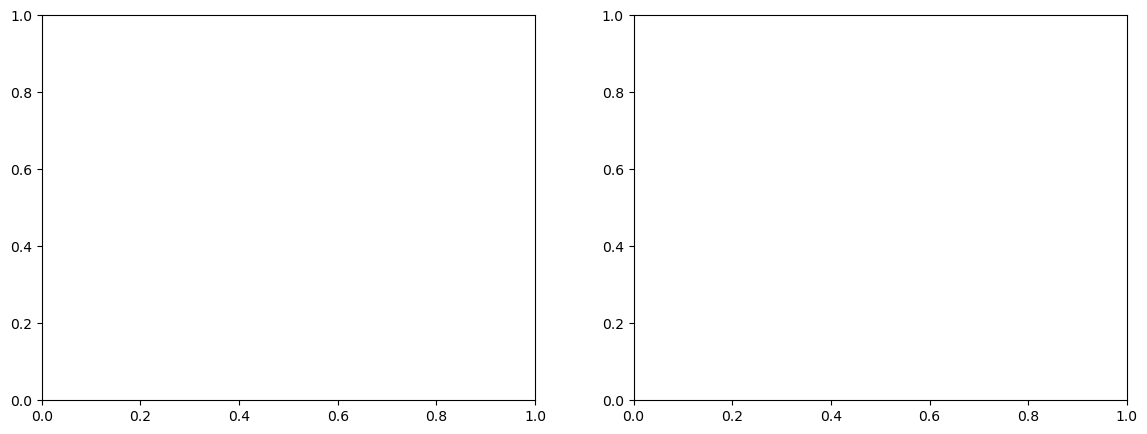

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (14,5))

axes[0].plot(
    k_M1S0['program_time'],
    k_M1S0['middle_tip_dist'],
    color = 'grey'
)
axes[0].set_title('Right hand - M1S0')
axes[0].set_xlabel('program_time (s)')
axes[0].set_ylabel('distance (m)')

axes[1].plot(
    k_M1S1['program_time'],
    k_M1S1['middle_tip_dist'],
    color = 'grey'
)
axes[1].set_title('Right hand - M1S1')
axes[1].set_xlabel('program_time (s)')
axes[1].set_ylabel('distance (m)')

fig.suptitle('ul003 - OC (each fing distance)')


OC mean distance - M1S0

In [20]:
dist_df_003_M1S0_DT_oc_rh = hp.OC_amp_mean(
    df_003_M1S0_DT_oc_rh,
    'index_tip',
    'middle_tip',
    'ring_tip',
    'pinky_tip'
    )

In [21]:
dist_df_003_M1S0_DT_oc_rh

,program_time,distance
0,10.4346,0.083137
1,10.4360,0.090429
2,10.4377,0.090429
3,10.4394,0.090429
4,10.4421,0.090429
...,...,...
6848,40.8604,0.081762
6849,40.8615,0.080941
6850,40.8723,0.082002
6851,40.8809,0.082002


OC mean distance - M1S1

In [22]:
dist_df_003_M1S1_DT_oc_rh = hp.OC_amp_mean(
    df_003_M1S1_DT_oc_rh,
    'index_tip',
    'middle_tip',
    'ring_tip',
    'pinky_tip'
    )

In [23]:
dist_df_003_M1S1_DT_oc_rh

,program_time,distance
0,8.2550,0.095124
1,8.2618,0.096572
2,8.2729,0.097104
3,8.2731,0.097104
4,8.2742,0.097104
...,...,...
11043,44.5460,0.073643
11044,44.5473,0.073643
11045,44.5473,0.073643
11046,44.5505,0.073643


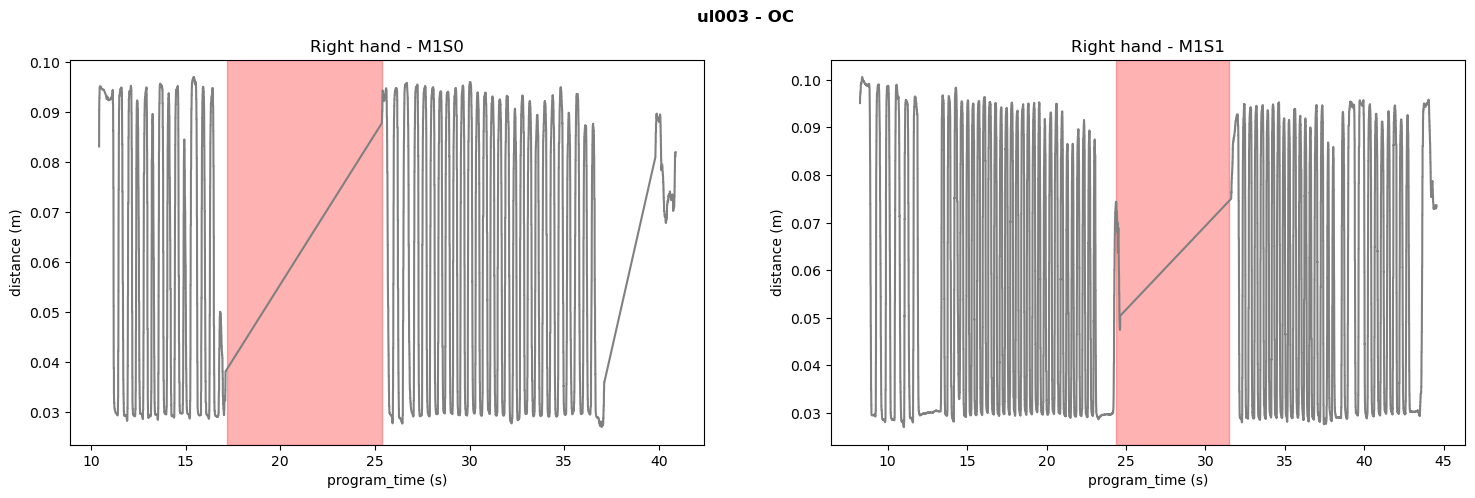

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (18,5))

axes[0].plot(
    dist_df_003_M1S0_DT_oc_rh['program_time'],
    dist_df_003_M1S0_DT_oc_rh['distance'],
    color = 'grey'
)
axes[0].set_title('Right hand - M1S0')
axes[0].set_xlabel('program_time (s)')
axes[0].set_ylabel('distance (m)')

axes[1].plot(
    dist_df_003_M1S1_DT_oc_rh['program_time'],
    dist_df_003_M1S1_DT_oc_rh['distance'],
    color = 'grey'
)
axes[1].set_title('Right hand - M1S1')
axes[1].set_xlabel('program_time (s)')
axes[1].set_ylabel('distance (m)')
fig.suptitle('ul003 - OC', fontweight ="bold")

axes[0].axvspan(17.2, 25.4, color="red", alpha = 0.3)
axes[1].axvspan(24.4, 31.5, color="red", alpha = 0.3)

fig.savefig(
            os.path.join(fig_path_003, 'ul003_M1SX_dt_comparison_oc'),
            dpi = 150, facecolor = 'w',
        )
# plt.show()

Finding Minima and Maxima

In [31]:
# def find_min_max(
#     df_time_dist,
#     hgt_min,
#     hgt_max,
#     col_name: str,
#     prom,
#     # prom_min,
#     # prom_max,
#     ):


In [32]:
importlib.reload(hp)
dict_min_max_dist_df_003_M1S0_DT_oc_rh = hp.find_min_max(
    dist_df_003_M1S0_DT_oc_rh,
    - 0.11, # hgt_min
    0.008, # hgt_max
    'distance',
    0.04,
    )    

min_idx_dist_df_003_M1S0_DT_oc_rh = dict_min_max_dist_df_003_M1S0_DT_oc_rh['min_idx'] 
max_idx_dist_df_003_M1S0_DT_oc_rh = dict_min_max_dist_df_003_M1S0_DT_oc_rh['max_idx']

-0.09702349020373532


Calculating Minima and Maxima - M1S1

In [33]:
importlib.reload(hp)
dict_min_max_dist_df_003_M1S1_DT_oc_rh = hp.find_min_max(
    dist_df_003_M1S1_DT_oc_rh,
    - 0.11, # hgt_min
    0.08, # hgt_max
    'distance',
    0.04,
    )    

min_idx_dist_df_003_M1S1_DT_oc_rh = dict_min_max_dist_df_003_M1S1_DT_oc_rh['min_idx'] 
max_idx_dist_df_003_M1S1_DT_oc_rh = dict_min_max_dist_df_003_M1S1_DT_oc_rh['max_idx']

-0.10058162997704735


Plotting Minima and Maxima

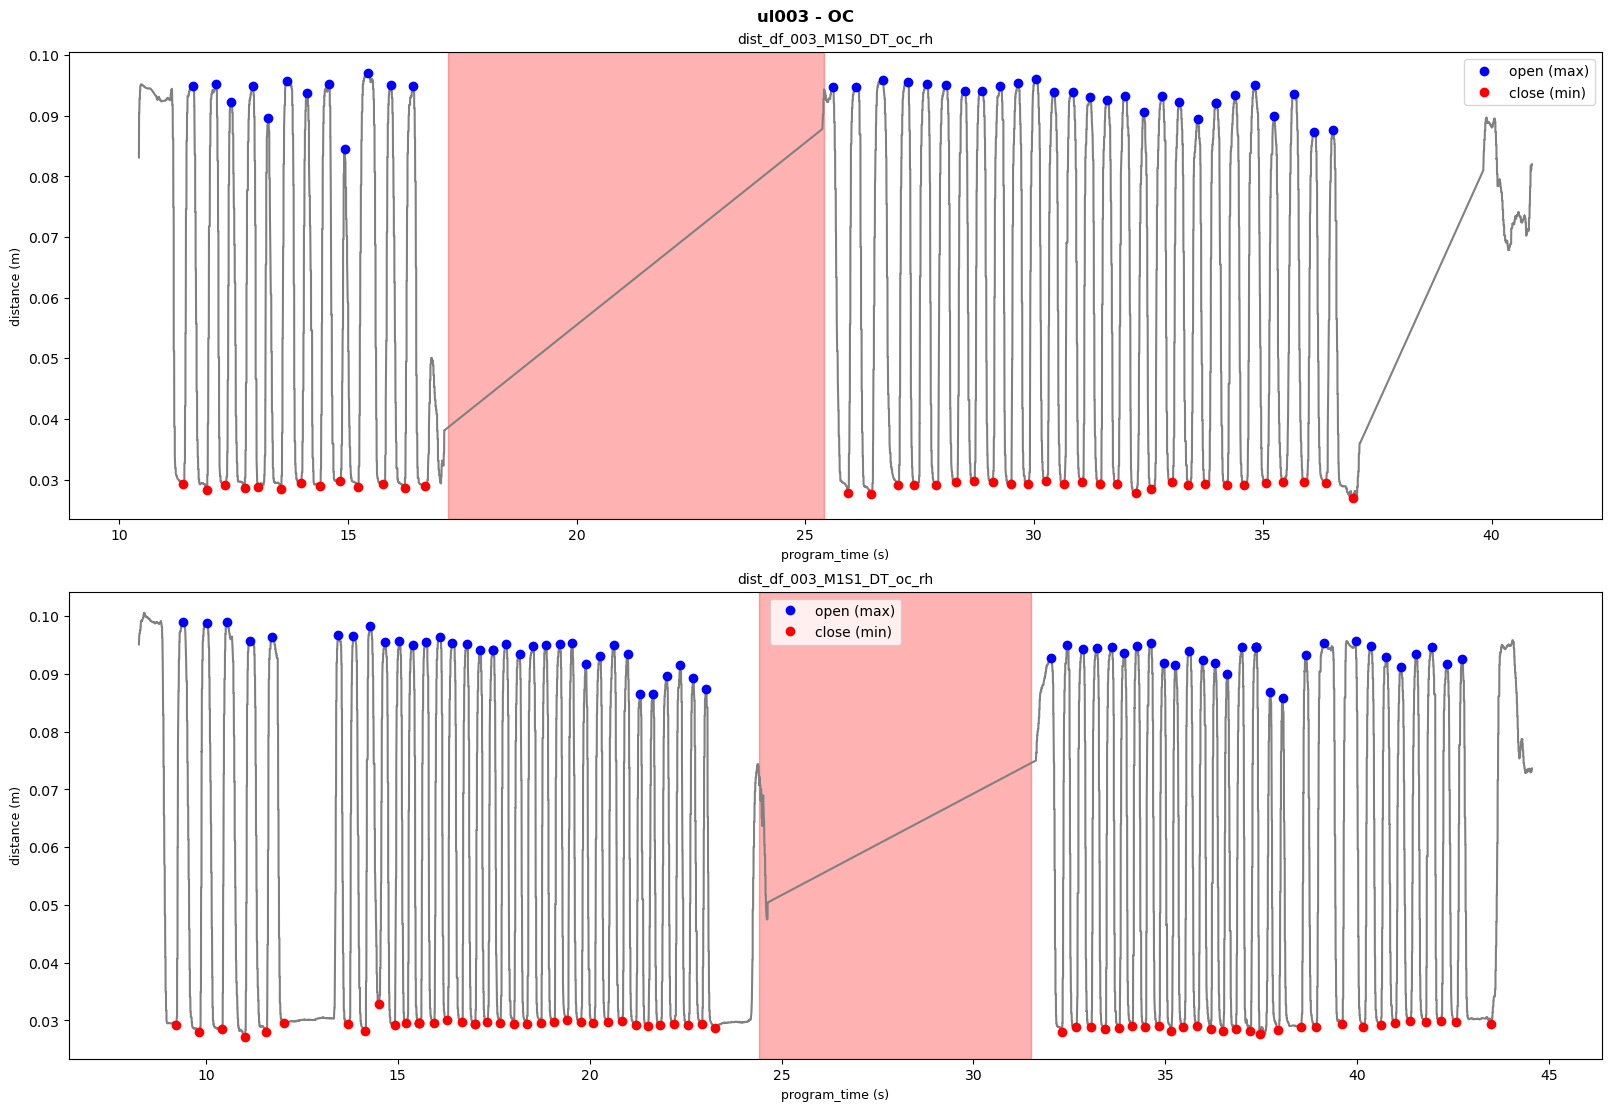

<Figure size 1600x500 with 0 Axes>

In [34]:
fig, axes = plt.subplots(2, 1, figsize = (16, 11), constrained_layout=True) 
plt.figure(figsize = (16,5))
axes[0].plot(dist_df_003_M1S0_DT_oc_rh['program_time'], dist_df_003_M1S0_DT_oc_rh['distance'], color = 'grey')
axes[0].plot(
    dist_df_003_M1S0_DT_oc_rh.iloc[max_idx_dist_df_003_M1S0_DT_oc_rh]['program_time'],
    dist_df_003_M1S0_DT_oc_rh.iloc[max_idx_dist_df_003_M1S0_DT_oc_rh]['distance'],
    "o", 
    label= "open (max)", 
    color='blue'
    )
axes[0].plot(
    dist_df_003_M1S0_DT_oc_rh.iloc[min_idx_dist_df_003_M1S0_DT_oc_rh]['program_time'],
    dist_df_003_M1S0_DT_oc_rh.iloc[min_idx_dist_df_003_M1S0_DT_oc_rh]['distance'], 
    "o", 
    label = "close (min)", 
    color ='red'
    )
axes[0].set_xlabel('program_time (s)', fontsize = 9)
axes[0].set_ylabel('distance (m)', fontsize = 9)
axes[0].legend()
axes[0].set_title('dist_df_003_M1S0_DT_oc_rh', fontsize = 10)


axes[1].plot(dist_df_003_M1S1_DT_oc_rh['program_time'], dist_df_003_M1S1_DT_oc_rh['distance'], color = 'grey')
axes[1].plot(
    dist_df_003_M1S1_DT_oc_rh.iloc[max_idx_dist_df_003_M1S1_DT_oc_rh]['program_time'],
    dist_df_003_M1S1_DT_oc_rh.iloc[max_idx_dist_df_003_M1S1_DT_oc_rh]['distance'],
    "o", 
    label= "open (max)", 
    color='blue'
    )
axes[1].plot(
    dist_df_003_M1S1_DT_oc_rh.iloc[min_idx_dist_df_003_M1S1_DT_oc_rh]['program_time'],
    dist_df_003_M1S1_DT_oc_rh.iloc[min_idx_dist_df_003_M1S1_DT_oc_rh]['distance'], 
    "o", 
    label = "close (min)", 
    color ='red'
    )
axes[1].set_xlabel('program_time (s)', fontsize = 9)
axes[1].set_ylabel('distance (m)', fontsize = 9)
axes[1].legend()
axes[1].set_title('dist_df_003_M1S1_DT_oc_rh', fontsize = 10)

axes[0].axvspan(17.2, 25.4, color="red", alpha=0.3)
axes[1].axvspan(24.4, 31.5, color="red", alpha=0.3)

# plt.tight_layout()
fig.suptitle('ul003 - OC', fontweight ="bold")
fig.savefig(
            os.path.join(fig_path_003, 'ul003_M1SX_dt_comparison_oc_min_max'),
            dpi = 150, facecolor = 'w',
        )
# plt.show()


SPEED_OC NEW

In [35]:
def speed_OC_time_series(
    df,
    max_idx,
    min_idx
    ):

    """
    Calculates the speed of pronation and supination.
    
    Input:
        - df (cleaned DataFrame), max_idx list, 
        min_idx list.
    
    Output:
        - dict: dictionary with pronation and 
        supination speeds.
    """

    speed_O = []
    speed_C = []

    for idx, (max, min) in enumerate(zip(max_idx, min_idx[:-1])):
        # max_idx[0] < min_idx[0] means that the patient started the exercise with pronation
        if max_idx[0] < min_idx[0]:
            
            max_dist_1 = df.iloc[max]['distance']
            max_dist_2 = df.iloc[max_idx[idx + 1]]['distance']
            max_time_1 = df.iloc[max]['program_time']
            max_time_2 = df.iloc[max_idx[idx + 1]]['program_time']

            min_dist_1 = df.iloc[min]['inv_distance']
            min_dist_2 = df.iloc[min_idx[idx+1]]['inv_distance']
            min_time_1 = df.iloc[min]['program_time']

            delta_dist_O = max_dist_2 - min_dist_1
            delta_time_O = max_time_2 - min_time_1

            delta_dist_C = min_dist_1 - max_dist_1
            delta_time_C = min_time_1 - max_time_1

            vel_O = delta_dist_O/delta_time_O
            vel_C = delta_dist_C/delta_time_C

            speed_O.append(vel_O)
            speed_C.append(vel_C)

        # max_idx[0] > min_idx[0] means that the patient started the exercise with supination
        # if max_idx[0] > min_idx[0]:
        else:
            max_dist_1 = df.iloc[max]['distance']
            max_time_1 = df.iloc[max]['program_time']

            min_dist_1 = df.iloc[min]['inv_distance']
            min_time_1 = df.iloc[min]['program_time']
            min_dist_2 = df.iloc[min_idx[idx + 1]]['inv_distance']
            min_time_2 = df.iloc[min_idx[idx + 1]]['program_time']

            delta_dist_O = max_dist_1 - min_dist_1
            delta_time_O = max_time_1 - min_time_1

            delta_dist_C = min_dist_2 - max_dist_1
            delta_time_C = min_time_2 - max_time_1

            vel_O = delta_dist_O/delta_time_O
            vel_C = delta_dist_C/delta_time_C

            speed_O.append(vel_O)
            speed_C.append(vel_C)
    dict = {'open_speed': speed_O,'close_speed': speed_C}
    return dict

In [36]:
dict_speedOC = speed_OC_time_series(
    dist_df_003_M1S0_DT_oc_rh,
    max_idx_dist_df_003_M1S0_DT_oc_rh, 
    min_idx_dist_df_003_M1S0_DT_oc_rh
    )


Opening Maximum Speed

In [37]:
open_max_speed = np.max(dict_speedOC['open_speed'])
open_max_speed

1.0224825777907511

Opening Minimum Speed

In [38]:
open_min_speed = np.min(dict_speedOC['open_speed'])
open_min_speed

-0.6653132360268239

Opening Mean Speed

In [39]:
open_mean_speed = np.mean(dict_speedOC['open_speed'])
open_mean_speed

0.4757124835793884

Opening Speed Standard Deviation

In [67]:
std_open_speed = np.std(dict_speedOC['open_speed'])
std_open_speed

0.46645459872192696

Closing Maximum Speed

In [40]:
close_max_speed = np.max(dict_speedOC['close_speed'])
close_max_speed

-0.13245781820408714

Closing Minimum Speed

In [41]:
close_min_speed = np.min(dict_speedOC['close_speed'])
close_min_speed

-1.1210171685324877

Closing Mean Speed

In [42]:
close_mean_speed = np.mean(dict_speedOC['close_speed'])
close_mean_speed

# Absolute Closing Speed
# abs(close_mean_speed)

-0.48957213087325685

Closing Speed Standard Deviation

In [68]:
std_close_speed = np.std(dict_speedOC['close_speed'])
std_close_speed

0.19848230559869912

Feature Extraction Function

In [44]:
def fts_ext():
    count_OC = len(min_idx_dist_df_003_M1S0_DT_oc_rh) # 1
    dict_freq_std = freq_tap(dist_df_003_M1S0_DT_oc_rh, min_idx_dist_df_003_M1S0_DT_oc_rh)
    std_freq = dict_freq_std['std_freq'] # 2
    mean_freq = np.mean(dict_freq_std['freq_per_tap']) # 3
    open_max_amp = np.max(dist_df_003_M1S0_DT_oc_rh.iloc[max_idx_dist_df_003_M1S0_DT_oc_rh]['distance']) # 4
    open_min_amp = np.min(dist_df_003_M1S0_DT_oc_rh.iloc[max_idx_dist_df_003_M1S0_DT_oc_rh]['distance']) # 5
    open_mean_amp = np.mean(dist_df_003_M1S0_DT_oc_rh.iloc[max_idx_dist_df_003_M1S0_DT_oc_rh]['distance']) # 6
    open_std_amp = np.std(dist_df_003_M1S0_DT_oc_rh.iloc[max_idx_dist_df_003_M1S0_DT_oc_rh]['distance']) # 7
    close_max_amp = np.max(dist_df_003_M1S0_DT_oc_rh.iloc[min_idx_dist_df_003_M1S0_DT_oc_rh]['distance']) # 8
    close_min_amp = np.max(dist_df_003_M1S0_DT_oc_rh.iloc[min_idx_dist_df_003_M1S0_DT_oc_rh]['distance']) # 9
    close_mean_amp = np.mean(dist_df_003_M1S0_DT_oc_rh.iloc[min_idx_dist_df_003_M1S0_DT_oc_rh]['distance']) # 10
    close_std_amp = np.std(dist_df_003_M1S0_DT_oc_rh.iloc[min_idx_dist_df_003_M1S0_DT_oc_rh]['distance']) # 11
    open_max_speed = np.max(dict_speedOC['open_speed']) # 12
    open_min_speed = np.min(dict_speedOC['open_speed']) # 13
    open_mean_speed = np.mean(dict_speedOC['open_speed']) # 14
    std_open_speed = np.std(dict_speedOC['open_speed'])
    close_max_speed = np.max(dict_speedOC['close_speed']) # 15
    close_min_speed = np.min(dict_speedOC['close_speed']) # 16
    close_mean_speed = np.mean(dict_speedOC['close_speed']) # 17
    std_close_speed = np.std(dict_speedOC['close_speed'])

    return
    
    

Number of Opening-Closing events

In [45]:
count_OC = len(min_idx_dist_df_003_M1S0_DT_oc_rh)
count_OC

40

Frequency per Opening-Closing 

In [46]:
def freq_tap(df_time_amp, min_idx):

    freq_per_tap = []

    for idx, min in enumerate(min_idx[:-1]):

        min_time1 = df_time_amp.iloc[min]['program_time']
        min_time2 = df_time_amp.iloc[min_idx[idx+1]]['program_time']
   
        delta_time = min_time2-min_time1
        freq = 1/delta_time

        freq_per_tap.append(freq)
        # time_ls.append(delta_time)
    std_freq = np.std(freq_per_tap)

    dict_freq_std = {'std_freq': std_freq, 'freq_per_tap': freq_per_tap}

    return dict_freq_std

Opening-Closing Frequency Standard Deviation

In [47]:
dict_freq_std = freq_tap(dist_df_003_M1S0_DT_oc_rh, min_idx_dist_df_003_M1S0_DT_oc_rh)
std_freq = dict_freq_std['std_freq']
std_freq

0.49719821823963467

Opening-Closing Mean Frequency

In [48]:
mean_freq = np.mean(dict_freq_std['freq_per_tap'])
mean_freq

2.3205798012979177

Amplitude variability - CHECK

In [66]:
std_amp = np.std(dist_df_003_M1S0_DT_oc_rh['distance'])
std_amp

0.02664187996112638

### Minimum, Maximum & Mean Amplitudes

Opening Maximum Amplitude

In [50]:
open_max_amp = np.max(dist_df_003_M1S0_DT_oc_rh.iloc[max_idx_dist_df_003_M1S0_DT_oc_rh]['distance'])
open_max_amp

0.09702349020373532

Opening Minimum Amplitude

In [51]:
open_min_amp = np.min(dist_df_003_M1S0_DT_oc_rh.iloc[max_idx_dist_df_003_M1S0_DT_oc_rh]['distance'])
open_min_amp

0.08452898724632002

Opening Mean Amplitude

In [52]:
open_mean_amp = np.mean(dist_df_003_M1S0_DT_oc_rh.iloc[max_idx_dist_df_003_M1S0_DT_oc_rh]['distance'])
open_mean_amp

0.09332923883498252

Opening Standard Deviation

In [53]:
open_std_amp = np.std(dist_df_003_M1S0_DT_oc_rh.iloc[max_idx_dist_df_003_M1S0_DT_oc_rh]['distance'])
open_std_amp

0.002624456999687381

Closing Maximum Amplitude

In [54]:
close_max_amp = np.max(dist_df_003_M1S0_DT_oc_rh.iloc[min_idx_dist_df_003_M1S0_DT_oc_rh]['distance'])
close_max_amp

0.029703514481128332

Closing Minimum Amplitude

In [55]:
close_min_amp = np.max(dist_df_003_M1S0_DT_oc_rh.iloc[min_idx_dist_df_003_M1S0_DT_oc_rh]['distance'])
close_min_amp

0.029703514481128332

Closing Mean Amplitude

In [56]:
close_mean_amp = np.mean(dist_df_003_M1S0_DT_oc_rh.iloc[min_idx_dist_df_003_M1S0_DT_oc_rh]['distance'])
close_mean_amp

0.02901614388335062

Closing Standard Deviation

In [57]:
close_std_amp = np.std(dist_df_003_M1S0_DT_oc_rh.iloc[min_idx_dist_df_003_M1S0_DT_oc_rh]['distance'])
close_std_amp

0.0006246903890674014

Dictionary with features(#)

In [69]:
feature_set = {
    'num_events': count_OC, 
    'open_max_amp': open_max_amp, 
    'open_min_amp': open_min_amp,
    'open_mean_amp': open_mean_amp,
    'open_std_amp': open_std_amp,
    'close_max_amp': close_max_amp,
    'close_min_amp': close_min_amp,
    'close_mean_amp': close_mean_amp,
    'close_std_amp': close_std_amp,
    'open_max_speed': open_max_speed,
    'open_min_speed': open_min_speed,
    'open_mean_speed': open_mean_speed,
    'std_open_speed': std_open_speed,
    'close_max_speed': close_max_speed,
    'close_min_speed': close_min_speed,
    'close_mean_speed': close_mean_speed,
    'std_close_speed': std_close_speed,
    'mean_freq': mean_freq,
    'std_freq': std_freq,
    }

In [70]:
len(feature_set)

19

In [74]:
df_feature_set = pd.DataFrame(feature_set, index=['ul003'])
df_feature_set

,num_events,open_max_amp,open_min_amp,open_mean_amp,open_std_amp,close_max_amp,close_min_amp,close_mean_amp,close_std_amp,open_max_speed,open_min_speed,open_mean_speed,std_open_speed,close_max_speed,close_min_speed,close_mean_speed,std_close_speed,mean_freq,std_freq
ul003,40,0.097023,0.084529,0.093329,0.002624,0.029704,0.029704,0.029016,0.000625,1.022483,-0.665313,0.475712,0.466455,-0.132458,-1.121017,-0.489572,0.198482,2.32058,0.497198
